# IBM "Applied Data Science Capstone" course
# (Week 3, Task 2)

(Written by: D. Espinosa, Current date: 2020-11-05).

This notebook contains all the weekly activities required to complete and pass the IBM "Applied Data Science Capstone" course, the last of "IBM Data Science" Professional Certificate. Each section contains the corresponding week's assignment. Please notice that this notebook will be continuosly updated, until explicitely state it as "Final Version".

## Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
* [Week 3, Task 2 (Segmenting and Clustering Neighborhoods in Toronto) - Background](#week3p2_0)
* [Week 3, Task 2 (Segmenting and Clustering Neighborhoods in Toronto) - Description](#week3p2_1)
* [Week 3, Task 2 (Segmenting and Clustering Neighborhoods in Toronto) - Solution](#week3p2_2)

### Week 3, Task 2: <a class="anchor" id="week3p2_0"></a>
### Segmenting and Clustering Neighborhoods in Toronto - Background

On Week 3, Task 1, we implemented the following code, that obtains some basic information about neighborhoods in Toronto.

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 

# Web scrapping
req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(req.content,'html5lib')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

df1=pd.DataFrame(df[0])
df1.rename(columns={'Postal Code':'PostalCode','Neighbourhood':'Neighborhood'},inplace=True)

# Preliminary dataset cleaning:
df1 = df1[df1['Borough'] != 'Not assigned'].reset_index(drop = True)
df1 = df1.groupby(['PostalCode','Borough'])['Neighborhood'].agg(', '.join).reset_index()
def check_equals(Borough,Neighborhood):
    if Neighborhood == 'Not Assigned':
        Neighborhood = Borough
    return Neighborhood   
df1['Neighborhood'] = df1.apply(lambda x:check_equals(x['Borough'], x['Neighborhood']),axis=1)
df1

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


### Week 3, Task 2: <a class="anchor" id="week3p2_1"></a>
### Segmenting and Clustering Neighborhoods in Toronto - Description

Now that we have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

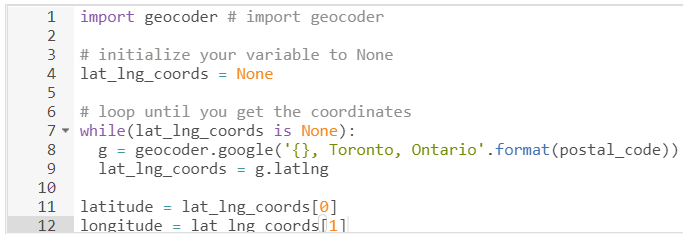

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

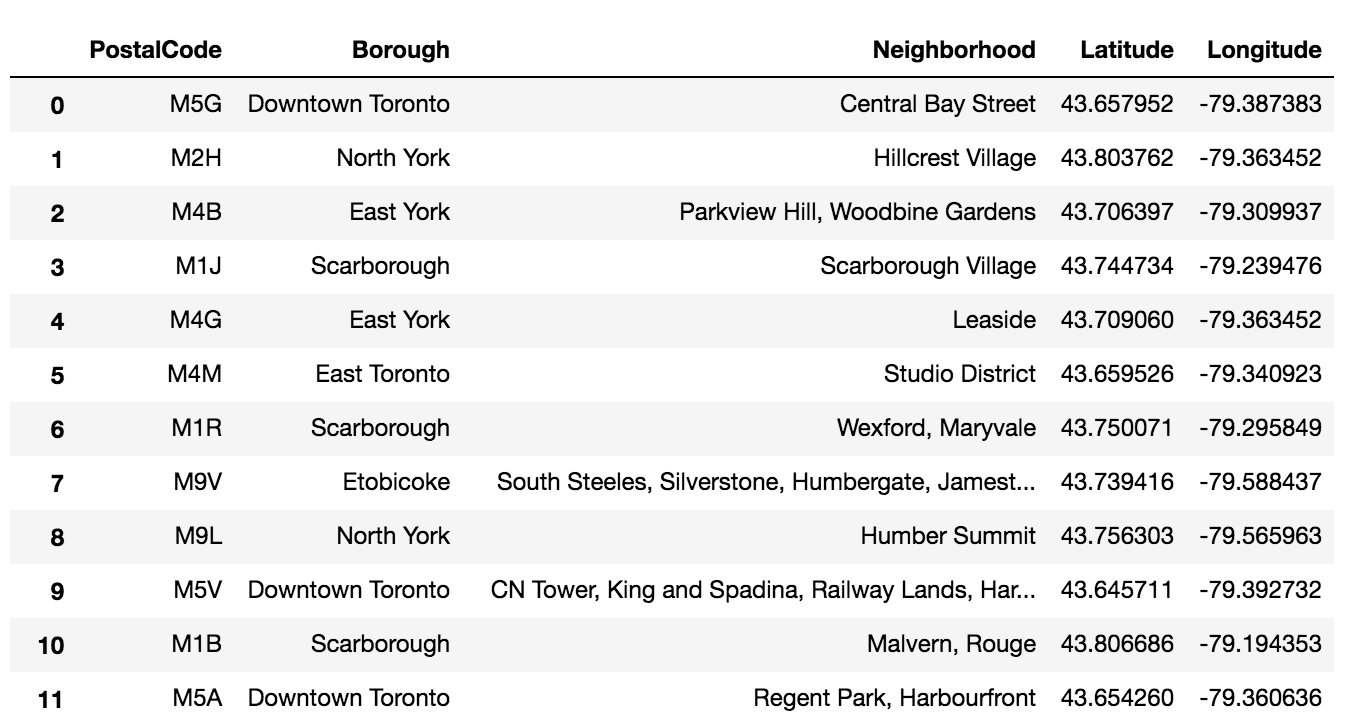

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (**2 marks**)

### Week 3, Task 2: <a class="anchor" id="week3p2_2"></a>
### Segmenting and Clustering Neighborhoods in Toronto - Solution 

First, we need to call the library 'geocoder', making sure to install it, if it is not available.

In [2]:
!pip install geocoder
import geocoder
import time # To measure the elapsed time later on
import pandas as np
import numpy as np

Let's try the previously installed package, with the example code provided, as well as some minor twists (please check the comments for further info):

In [3]:
# initialize your variable to None
lat_lng_coords = None
postal_code = 'M5G'
attempts = 0

starttime = time.time()

#loop until you get the coordinates
while(lat_lng_coords is None):
    g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
    lat_lng_coords = g.latlng    
    attempts+=1
    if attempts % 10 == 0:
        print('Number of unsuccessful attempts:',attempts)
    if attempts > 99:
        print('WARNING: Too many failed attempts! Try reading the provided \'containment .csv\' file instead!')
        break

endtime = time.time()

if lat_lng_coords != None:
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    print(latitude, longitude)

print('Elapsed time in a SINGLE search request: {:.2f} seconds'.format(endtime-starttime))

Number of unsuccessful attempts: 10
Number of unsuccessful attempts: 20
Number of unsuccessful attempts: 30
Number of unsuccessful attempts: 40
Number of unsuccessful attempts: 50
Number of unsuccessful attempts: 60
Number of unsuccessful attempts: 70
Number of unsuccessful attempts: 80
Number of unsuccessful attempts: 90
Number of unsuccessful attempts: 100
Elapsed time in a SINGLE search request: 90.99 seconds


Ups! It seems it did not work. We could increase the number of attempts, but lets be practical: with around 24 seconds per row, and with 'only' 94 rows in our dataset (this dataframe is a relatively 'tiny' one), we would spend around **38 minutes waiting**! For practical purposes, and provided we are working with a real-life data, it might be a good idea to approach with other Geocoding API, maybe a paid one. Let's move on the, to read the temporarily provided csv file:

In [4]:
geocode_df = pd.read_csv('Geospatial_Coordinates.csv')
geocode_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


We are nearly there! Now, we are going to use the [merge function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) to join the dataframes, but we need to rename the column 'PostalCode' on 'geocode_df', since this will be the "Column or index level names to join on"; next, we perform the merge:

In [5]:
geocode_df.rename(columns={'Postal Code':'PostalCode'},inplace=True)
geocode_df.columns

Index(['PostalCode', 'Latitude', 'Longitude'], dtype='object')

In [6]:
df2 = pd.merge(left=df1,right=geocode_df,on='PostalCode')
df2

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In both the original an final dataframe, we have 94 rows, so this is a signal that we might not have to proceed onto further cleaning; however and just for the sake of security, let's check if there is any np.NaN value on the recently added rows:

In [7]:
df2.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

The task is now complete.